


# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  In this project we will investigate about movies dataset provided by **TMDb Movie Database**. 
>  
> We will walk throw data analysis process for more than 10,000 movies which cotains many important data such as ratings by users , revenue , release date & year ,cast , popularity and genres for each movie.
>
#### From this data we can ask these quesions:
>
>Which movie has the highest profit ? and which is lowest?
>
>What's the Averge run time these movies?
>
>Did the realesed movies per year increased since 1960 to 2015?
>
>Which season of the year the production companies realese movies?
>
>which genres make a higher profits , higher votes and more popular than other's?

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

printing a few lines of the data set to see columns  names

In [39]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [40]:
df.shape

(10866, 21)

>There is **21** columns in this dataset but  some of them are unnecessary  for our analysis such as id and home page so they will be removed and other columns needs to be cleaned to be suitable for analysis such as **genres** column which contains main genre and other genres so we will adjust it to contain only the first genre, all that will be implemented  in the cleaning process.




In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>there is some null values in our data, let's count them 

In [42]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [43]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>seem that release date column not in a date format , let's check for duplicates

In [44]:
df.duplicated().sum()

1

one duplicated row

### Data Cleaning (Replace this with more specific notes!)

>Removing unnecessary columns for our analysis 

In [45]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj','cast','vote_count','production_companies'], axis = 1, inplace=True)

>Converting release date column to an appropriate date format then adding column released month

In [46]:
df['release_date']=pd.to_datetime(df['release_date'] )

In [47]:
df['release_month'] = df['release_date'].dt.month

>removing duplicted row

In [48]:
df.drop_duplicates(inplace=True)

>let's make every movie hold one genre to make it easiest to analyis 
>
>Firstly let's split the list genres for each movie in genres column

In [49]:
split_genres=df.genres.str.split("|",expand=True)

>Secondly , take the first genre on the list for each movie

In [50]:
df['genre']=split_genres[0]

>deleting genres column as it became unnecessary

In [51]:
df.drop(columns='genres',inplace=True)

let's add profit column which results from revenue minus budget

In [52]:
df.insert(3,'profit','')
df['profit']=df['revenue']-df['budget']

In [53]:
df.drop(['budget','revenue'], axis = 1, inplace=True)

In [54]:
df.head()

,popularity,profit,original_title,director,runtime,release_date,vote_average,release_year,release_month,genre
0,32.985763,1363528810,Jurassic World,Colin Trevorrow,124,2015-06-09,6.5,2015,6,Action
1,28.419936,228436354,Mad Max: Fury Road,George Miller,120,2015-05-13,7.1,2015,5,Action
2,13.112507,185238201,Insurgent,Robert Schwentke,119,2015-03-18,6.3,2015,3,Adventure
3,11.173104,1868178225,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,7.5,2015,12,Action
4,9.335014,1316249360,Furious 7,James Wan,137,2015-04-01,7.3,2015,4,Action


<a id='eda'></a>
## Exploratory Data Analysis


### which movie has  the highest profit ?

In [55]:
maxx=df.profit.max()
df.loc[df[df['profit']==maxx].index,['original_title','profit']]

,original_title,profit
1386,Avatar,2544505847


### which movie has  the lowest profit ?

In [56]:
min_rev=df.profit.min()
df.loc[df[df['profit']==min_rev].index,['original_title','profit']]

,original_title,profit
2244,The Warrior's Way,-413912431


### Averge run time

In [57]:
df.runtime.mean() 

102.07179015186378

about one hour & half

### Number of movies released over years since 1960 to 2015

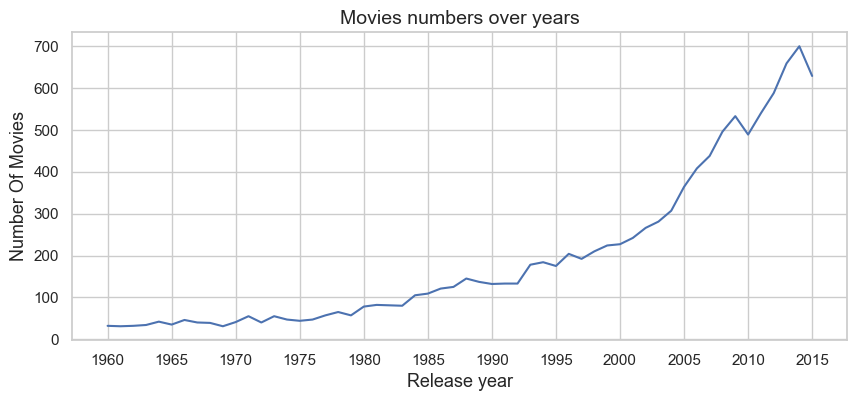

In [58]:
df.groupby('release_year').count()['original_title'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Movies numbers over years",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

### which month have the highest released movies since 1960 untill 2015 ?


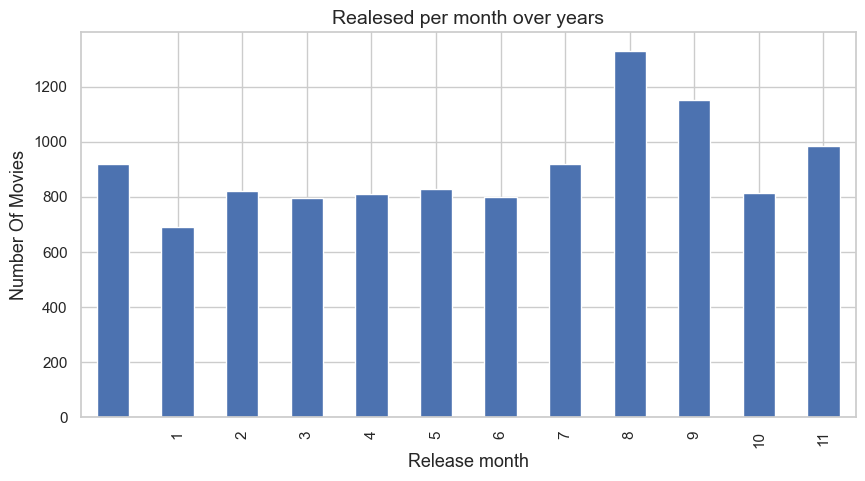

In [59]:
df.groupby(['release_month']).count()['original_title'].plot(xticks = np.arange(1,12,1),kind='bar')

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Realesed per month over years",fontsize = 14)
plt.xlabel('Release month',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

> ### seem that production companies tend to realese more movies in August & Septemper

### Now lets create a new dataframe called means that contains mean profits , votes and popularity for each genre in order to find out which movie genre have more audience

>Let's get the mean profits first sorted from maximum  to minmum genre profits

In [60]:
df_profit=df.groupby(['genre'])['profit'].mean().astype(int).to_frame(name = 'mean_profit').reset_index().sort_values('mean_profit',ascending=False)

getting the mean votes too for each genre

In [61]:
df_vote=df.groupby(['genre'])['vote_average'].mean().astype(float).to_frame(name = 'mean_votes').reset_index()

creating means data frame

In [62]:
means=pd.merge(df_profit,df_vote)

In [63]:
means.head()

,genre,mean_profit,mean_votes
0,Adventure,84522478,6.052048
1,Science Fiction,54544578,5.963551
2,Animation,49964298,6.414888
3,Fantasy,43845207,5.795956
4,Family,43135865,5.945833


as it organized by max descending profits so we wil plot first five only

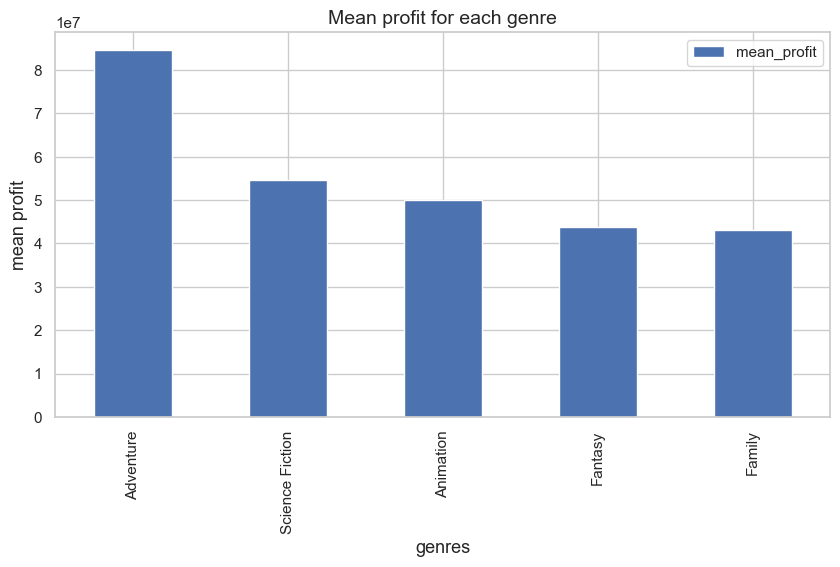

In [64]:
means.iloc[0:5].plot(x ='genre', y='mean_profit', kind = 'bar')
sns.set(rc={'figure.figsize':(10,4)})
plt.title("Mean profit for each genre",fontsize = 14)
plt.xlabel('genres',fontsize = 13)
plt.ylabel('mean profit',fontsize = 13)
sns.set_style("whitegrid")

Adventure movies has the higher mean profits

Now let's see their votes in the same order (largest 5 profits)

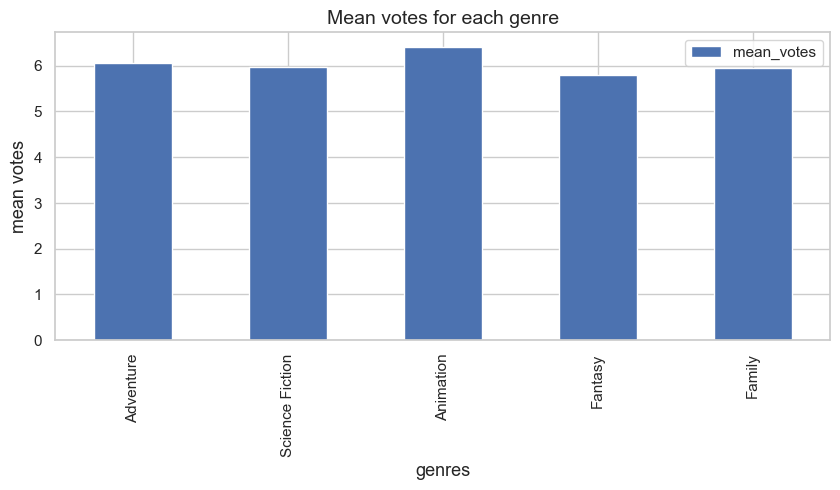

In [65]:
means.iloc[0:5].plot(x ='genre', y='mean_votes', kind = 'bar')
sns.set(rc={'figure.figsize':(10,4)})
plt.title("Mean votes for each genre",fontsize = 14)
plt.xlabel('genres',fontsize = 13)
plt.ylabel('mean votes',fontsize = 13)
sns.set_style("whitegrid")

### seem that all genres are close to each other so that we can run a comparison between them as none of them has a low ratings

<a id='conclusions'></a>
## Conclusions
>Seem that adventure movies have the highest profits and votes  

>we said previously that Avatar have the highest profit and because we considerd one genre for each movie  so let's print it again from the main data frame to see it's all genres

In [66]:
df=pd.read_csv('tmdb-movies.csv') 

In [67]:
df[df['original_title']=='Avatar']['genres']

1386    Action|Adventure|Fantasy|Science Fiction
Name: genres, dtype: object

#### Avatar hold all genres that  wanted from the audience so maybe that's the reason why it has the highest profit's

## Limitaions

>ther's some missing data in some columns which would be helpful to go farther in our analysis.
>
>such as the cast column which we can use to find out if a particular actor\s make the movie sucess or not
>and also for the directors & production companies which have a 1030 misssing values which could tell us if the production companies effects the movie revenues and it's popularity and votes rating's

In [69]:
import session_info
session_info.show()